<a href="https://colab.research.google.com/github/Pathu2617/Stanford-Cars-Image-Classification-Deep-Learning-/blob/main/Stanford_Car_Dataset_by_classes__CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import all Important Libraries
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file="jutrera/stanford-car-dataset-by-classes-folder"

path=kagglehub.dataset_download(file)
print('Path to Dataset Files = ',path)

Using Colab cache for faster access to the 'stanford-car-dataset-by-classes-folder' dataset.
Path to Dataset Files =  /kaggle/input/stanford-car-dataset-by-classes-folder


In [ ]:
print(os.listdir(path))

['names.csv', 'car_data', 'anno_test.csv', 'anno_train.csv']


In [ ]:
train_dir=os.path.join(path,'car_data/car_data','train')
val_dir=os.path.join(path,'car_data/car_data','test')

In [ ]:
train_dir

'/kaggle/input/stanford-car-dataset-by-classes-folder/car_data/car_data/train'

In [ ]:
# Data Augmentation
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=20,
    class_mode='categorical'
)

Found 8144 images belonging to 196 classes.


In [ ]:
# Validation
val_datagen=ImageDataGenerator(
    rescale=1./255
)
val_generator=val_datagen.flow_from_directory(
    val_dir,
    target_size=(128,128),
    batch_size=40,
    class_mode='categorical'
)

Found 8041 images belonging to 196 classes.


In [ ]:
val_generator

In [ ]:
# Show Image matrix from train data
image,label=next(train_generator)
print('Image Shape',image.shape)
print('Labels Shape',label.shape)

print('First image matrix \n',image[0])

Image Shape (20, 128, 128, 3)
Labels Shape (20, 196)
First image matrix 
 [[[0.23657523 0.16629364 0.07891179]
  [0.26941192 0.19098054 0.09294133]
  [0.18275534 0.128478   0.05239702]
  ...
  [0.24954678 0.15202889 0.03555477]
  [0.24242458 0.14749657 0.03684972]
  [0.23530236 0.14296426 0.03814467]]

 [[0.19524159 0.1361545  0.06341167]
  [0.2685508  0.19011943 0.09208021]
  [0.21720006 0.15345043 0.06875826]
  ...
  [0.21200475 0.12618381 0.04105645]
  [0.21588959 0.12683128 0.03911404]
  [0.21977443 0.12747875 0.03717161]]

 [[0.15390794 0.10601538 0.04791155]
  [0.26768968 0.18925832 0.09121909]
  [0.25164476 0.17842284 0.0851195 ]
  ...
  [0.24394129 0.13695301 0.03514317]
  [0.25041604 0.14083785 0.03708559]
  [0.25689077 0.1447227  0.03902801]]

 ...

 [[0.04082911 0.06124367 0.09616243]
  [0.03046953 0.0457043  0.07673822]
  [0.02010995 0.03016492 0.057314  ]
  ...
  [0.96375877 0.8947242  0.7185943 ]
  [0.8226765  0.7473141  0.5988061 ]
  [0.6362989  0.5719624  0.4488023 ]]



(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

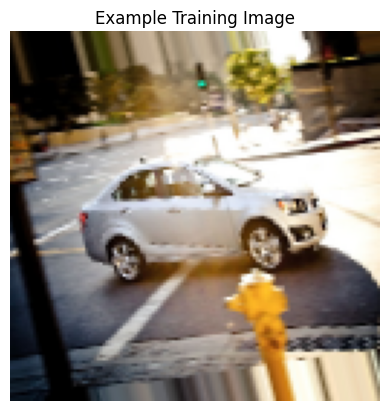

In [ ]:
# To Visualize The Image (Optional)
import matplotlib.pyplot as plt

plt.imshow(image[0])
plt.title('Example Training Image')
plt.axis('Off')

In [ ]:
# Build CNN model
model=models.Sequential(
[
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3),padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(196,activation='softmax')

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 196)            │        25,284 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,805,060 (14.52 MB)

 Trainable params: 3,805,060 (14.52 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,validation_data=val_generator,epochs=10)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 142s 334ms/step - accuracy: 0.0035 - loss: 5.2847 - val_accuracy: 0.0111 - val_loss: 5.2353
Epoch 2/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 100s 245ms/step - accuracy: 0.0095 - loss: 5.2011 - val_accuracy: 0.0131 - val_loss: 5.1430
Epoch 3/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 101s 247ms/step - accuracy: 0.0186 - loss: 5.0889 - val_accuracy: 0.0238 - val_loss: 5.0505
Epoch 4/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 102s 250ms/step - accuracy: 0.0317 - loss: 4.9679 - val_accuracy: 0.0264 - val_loss: 5.0947
Epoch 5/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 101s 246ms/step - accuracy: 0.0375 - loss: 4.8672 - val_accuracy: 0.0402 - val_loss: 4.9410
Epoch 6/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 101s 247ms/step - accuracy: 0.0468 - loss: 4.7299 - val_accuracy: 0.0414 - val_loss: 4.9004
Epoch 7/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 100s 246ms/step - accuracy: 0.0670 - loss: 4.5745 - val_accuracy: 0.0479 - val_loss: 4.8837
Epoch 8/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 102s 250ms/step - accuracy: 0.0903 -

In [ ]:
from tensorflow.keras.preprocessing import image
img_path='/content/Aura_integra.jpg'
imag=image.load_img(img_path,target_size=(128,128))
img_array=image.img_to_array(imag)/255
img_array=np.expand_dims(img_array,axis=0)
img_array

array([[[[0.3764706 , 0.3764706 , 0.38431373],
         [0.36862746, 0.37254903, 0.38039216],
         [0.37254903, 0.3764706 , 0.38431373],
         ...,
         [0.23137255, 0.2509804 , 0.26666668],
         [0.07450981, 0.08235294, 0.07058824],
         [0.15686275, 0.16470589, 0.16078432]],

        [[0.37254903, 0.37254903, 0.38039216],
         [0.3647059 , 0.36862746, 0.3764706 ],
         [0.3647059 , 0.36862746, 0.3764706 ],
         ...,
         [0.23137255, 0.22745098, 0.2509804 ],
         [0.05882353, 0.07843138, 0.0627451 ],
         [0.22745098, 0.23137255, 0.24705882]],

        [[0.36862746, 0.36862746, 0.3764706 ],
         [0.36862746, 0.3764706 , 0.37254903],
         [0.36078432, 0.36862746, 0.3647059 ],
         ...,
         [0.14117648, 0.14117648, 0.14117648],
         [0.07450981, 0.07450981, 0.06666667],
         [0.2       , 0.2       , 0.23921569]],

        ...,

        [[0.10588235, 0.07843138, 0.05490196],
         [0.09411765, 0.07450981, 0.05882353]

In [ ]:
prediction=model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


In [ ]:
class_labels=list(train_generator.class_indices.keys())
class_labels[np.argmax(prediction)]

'McLaren MP4-12C Coupe 2012'

In [ ]:
# DropOut Layer
# Build CNN model
model=models.Sequential(
[
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3),padding='same'),
    layers.Dropout(0.3),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    layers.Dropout(0.2),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.16)
    layers.Dense(196,activation='softmax')

])